In [1]:
!pip install easyocr

     ---------------------------------------- 2.9/2.9 MB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 35.0/35.0 MB 1.0 MB/s eta 0:00:00
     -------------------------------------- 95.1/95.1 kB 778.8 kB/s eta 0:00:00
     ------------------------------------ 313.0/313.0 kB 807.5 kB/s eta 0:00:00


In [1]:
import cv2
import numpy as np 

import matplotlib.pyplot as plt 
#import imutils
import easyocr

import os 

In [2]:
os.chdir(r"E:")

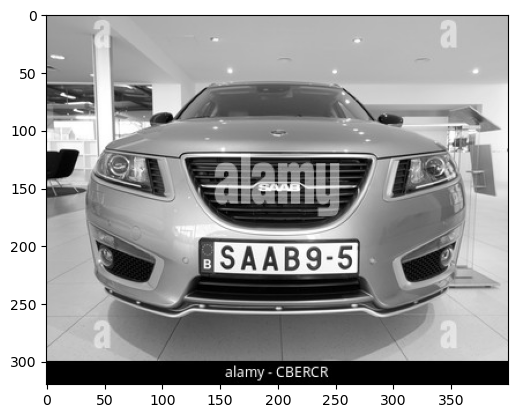

In [22]:
img = cv2.imread("image44.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

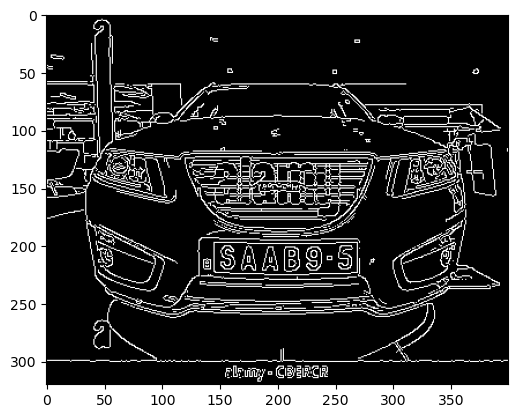

In [23]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) 
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [24]:
import imutils
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contourss = imutils.grab_contours(keypoints)
contours = sorted(contourss, key=cv2.contourArea, reverse=True)[:10]


In [25]:
len(contours)

10

In [26]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
len(location)  

4

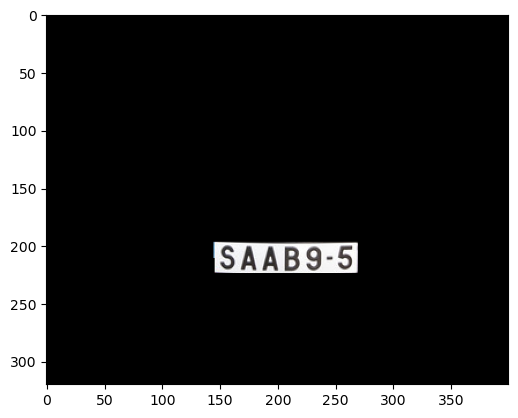

In [29]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], -1,255, -1)

new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [30]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

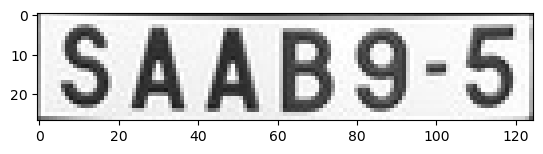

In [31]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [32]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[2, 0], [125, 0], [125, 27], [2, 27]], 'SAAB9-5', 0.9994978003936508)]

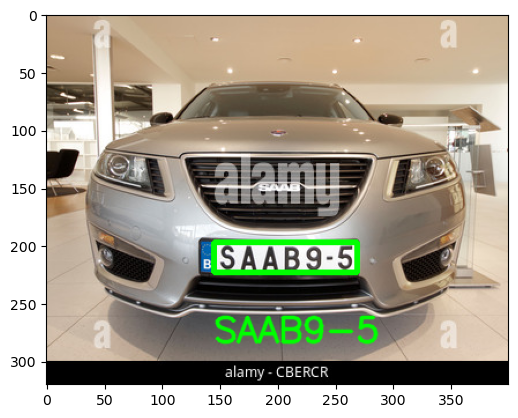

In [33]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))